<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_Homework_3_EHS_COMPLETED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBH 6886 Homework 3
## Completed by Edward Sung
## Completed on 11/12/24

Note: suppressWarnings() is used on train() since it generates a lot of warnings related to:

Warning message:
“Setting row names on a tibble is deprecated.”

In [ ]:
# Install Libraries
install.packages("caret")
install.packages("ggplot2")
install.packages("pROC")
install.packages("leaps")
install.packages("glmnet")
install.packages("pls")
install.packages("gridExtra")

In [ ]:
# Load libraries
library(dplyr)
library(caret)
library(ggplot2)
library(pROC)
library(readr)
library(leaps)
library(glmnet)
library(pls)
library(gridExtra)

# Table of Contents

>[Question 1](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=ie04LrBsroWk)

>>[(a)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=gB57HSAbr-Sf)

>>[(b)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=icSO4my9xW5a)

>>[(c)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=ObUVUztM5oD-)

>>[(d)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=YJsQ3bj7NUPl)

>>[(e)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=FPblk5BnUiN5)

>>[(f)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=L5alL0vhgN_e)

>>[(g)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=dhor99iGiFtl)

>>[(h)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=qgwaW6CGrqTb)

>>[(i)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=dYnTijnsvwB0)

>>[(j)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=DdTP9E0R8ODf)

>[Question 2](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=gSWqegXyjB28)

>>[(a)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=JR_IAoG1jiV8)

>>[(b)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=gWPdCdOGJHKh)

>>[(c)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=HnRNHXHlJh_M)

>>[(d)](#updateTitle=true&folderId=1r-g8wJfeKaGd9a8yLWY3NoKaegmzbrzB&scrollTo=Zc-oLR1YL5ki)



# Question 1
(106 pts.) The data set tecator from the caret package contains data from 215 samples of meat that were analyzed for water, fat, and protein content. Each sample was also analyzed on a Tecator Infratec Food and Feed Analyzer working in the wavelength range 850 - 1050 nm by the Near Infrared Transmission (NIT)
principle. The Tecator Analyzer provides absorbency measures at 100 different wavelengths in the 850 - 1050 nm range. For the purposes of this assignment, we will only use the first 130 observations from this data set. Use the following code to load the data, create the predictor matrix, and create the response vector.

In [3]:
library(caret)

# load dataset
data(tecator)

# create predictor matrix
absorp_X <- absorp[1:130,]
colnames(absorp_X) <- paste0("wl", 1:100) # name variables wl1, ..., wl100

# create response vector
protein <- endpoints[1:130,3]

## (a)
(6 pts.) Suppose that we want to fit a linear regression model that uses the absorbency measures to predict protein content. Briefly explain why the least squares estimates for a linear regression model based on the absorbency measures may not provide the best predictive model with respect to prediction error.

A linear regression model may not be the best predictive model due to the shape of the absorption graph. Molecules will have a peak wavelength where it absorbs the most, but then curve down on either ends of the peak when the wavelengh is too low or too high. A linear regression model will try to average the whole graph and cut through the middle of the curve, thus having poor prediction error and a high least squares estimates. It will also miss the peak, which is the important measurement in identifiying molecules based on absorption.

## (b)
(6 pts.) Regardless of what was stated in part (a) fit a linear regression model via least squares estimation with the absorbency measures as the predictors and protein content as the response. Report the 10-fold CV RMSE and R2 values.

In [4]:
# set seed
set.seed(1234)

# lm using least square estimation with 10-fold CV
lm_reg_absorp_10cv <- suppressWarnings(train(x = absorp_X,
                                             y = protein,
                                             method = "lm",
                                             trControl = trainControl(method = "cv", number = 10)))

lm_reg_absorp_10cv

Linear Regression 

130 samples
100 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 117, 116, 116, 118, 116, 118, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  2.572102  0.7048167  1.54235

Tuning parameter 'intercept' was held constant at a value of TRUE

10-fold CV RMSE is 2.572102

10-fold CV R2 is 0.7048167

## (c)
(12 pts.) Conduct forward stepwise selection for constructing a linear regression model to predict protein content using the absorbency measures. Use 10-fold CV RMSE to select your final model. Which absorbency measures are included in your final model? Report the 10-fold CV RMSE and R2 values for the final model. DO NOT print out a table with 100 rows showing the results from the train() function. Instead, make a scatterplot of tuning parameter vs. CV RMSE that indicates the optimal tuning parameter value.

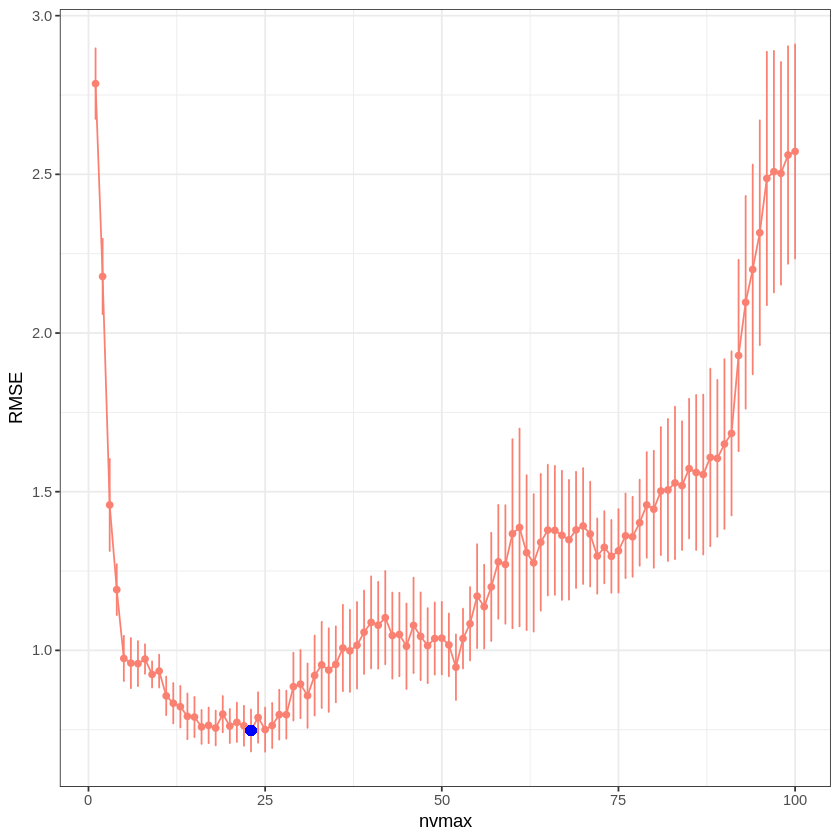

In [5]:
# set seed
set.seed(1234)

# lm using forward stepwise selection with 10-fold CV
lm_reg_absorp_10cv_forwardstep <- suppressWarnings(train(x = absorp_X,
                                                         y = protein,
                                                         method = "leapForward",
                                                         tuneGrid = data.frame(nvmax = 1:ncol(absorp_X)),
                                                         trControl = trainControl(method = "cv", number = 10)))

# Final Model values
final_forwards_nvmax = lm_reg_absorp_10cv_forwardstep$finalModel$tuneValue
final_forwards_rmse = lm_reg_absorp_10cv_forwardstep$results$RMSE[as.numeric(final_forwards_nvmax)]
final_forwards_r2 = lm_reg_absorp_10cv_forwardstep$results$Rsquared[as.numeric(final_forwards_nvmax)]

# nvmax and RMSE plot
lm_reg_absorp_10cv_forwardstep$results %>%
  ggplot(aes(x = nvmax, y = RMSE)) +
  geom_point(col = "salmon") +
  geom_line(col = "salmon") +
  geom_errorbar(aes(ymin = RMSE - RMSESD/sqrt(10),
                    ymax = RMSE + RMSESD/sqrt(10)),
                width = 0.2, position = position_dodge(0.9),
                col = "salmon") +
  geom_point(data = lm_reg_absorp_10cv_forwardstep$results[as.numeric(final_forwards_nvmax), ],
             aes(x = nvmax, y = RMSE),
             color = "blue", size = 3, shape = 16) +
  theme_bw()

In [6]:
print("RMSE was used to select the optimal model using the smallest value.")
print(paste("The final value used for the model was nvmax =", final_forwards_nvmax))

print(paste("10-fold CV RMSE for nvmax", final_forwards_nvmax, "is", final_forwards_rmse))
print(paste("10-fold CV R2 for nvmax", final_forwards_nvmax, "is", final_forwards_r2))

[1] "RMSE was used to select the optimal model using the smallest value."
[1] "The final value used for the model was nvmax = 23"
[1] "10-fold CV RMSE for nvmax 23 is 0.747603429720172"
[1] "10-fold CV R2 for nvmax 23 is 0.941207330145343"


In [7]:
# Final model outmat
final_forwards_outmat <- summary(lm_reg_absorp_10cv_forwardstep$finalModel)$outmat

# Selected wavelengths have a *
final_forwards_row <- final_forwards_outmat[nrow(final_forwards_outmat), ]
selected_predictors_forwards <- names(final_forwards_row)[final_forwards_row == "*"]

print("Absorbency measures that are included in the final model")
selected_predictors_forwards_list <- list(strsplit(gsub("''", ",", selected_predictors_forwards), ","))
selected_predictors_forwards_list

[1] "Absorbency measures that are included in the final model"


[[1]]
[[1]][[1]]
[1] "wl1"

[[1]][[2]]
[1] "wl3"

[[1]][[3]]
[1] "wl13"

[[1]][[4]]
[1] "wl16"

[[1]][[5]]
[1] "wl18"

[[1]][[6]]
[1] "wl19"

[[1]][[7]]
[1] "wl23"

[[1]][[8]]
[1] "wl26"

[[1]][[9]]
[1] "wl28"

[[1]][[10]]
[1] "wl29"

[[1]][[11]]
[1] "wl30"

[[1]][[12]]
[1] "wl31"

[[1]][[13]]
[1] "wl34"

[[1]][[14]]
[1] "wl36"

[[1]][[15]]
[1] "wl38"

[[1]][[16]]
[1] "wl39"

[[1]][[17]]
[1] "wl41"

[[1]][[18]]
[1] "wl50"

[[1]][[19]]
[1] "wl52"

[[1]][[20]]
[1] "wl80"

[[1]][[21]]
[1] "wl92"

[[1]][[22]]
[1] "wl97"

[[1]][[23]]
[1] "wl100"

## (d)
(14 pts.) Conduct backward stepwise selection for constructing a linear regression model to predict protein content using the absorbency measures. Use 10-fold CV RMSE to select your final model. Which absorbency measures are included in your final model? Report the 10-fold CV RMSE and R2 values for the final model. DO NOT print out a table with 100 rows showing the results from the
train() function. Instead, make a scatterplot of tuning parameter vs. CV RMSE that indicates the optimal tuning parameter value. Is there any overlap in the set of variables selected using forward stepwise selection and those selected by backward stepwise selection? If so, what are the variables.

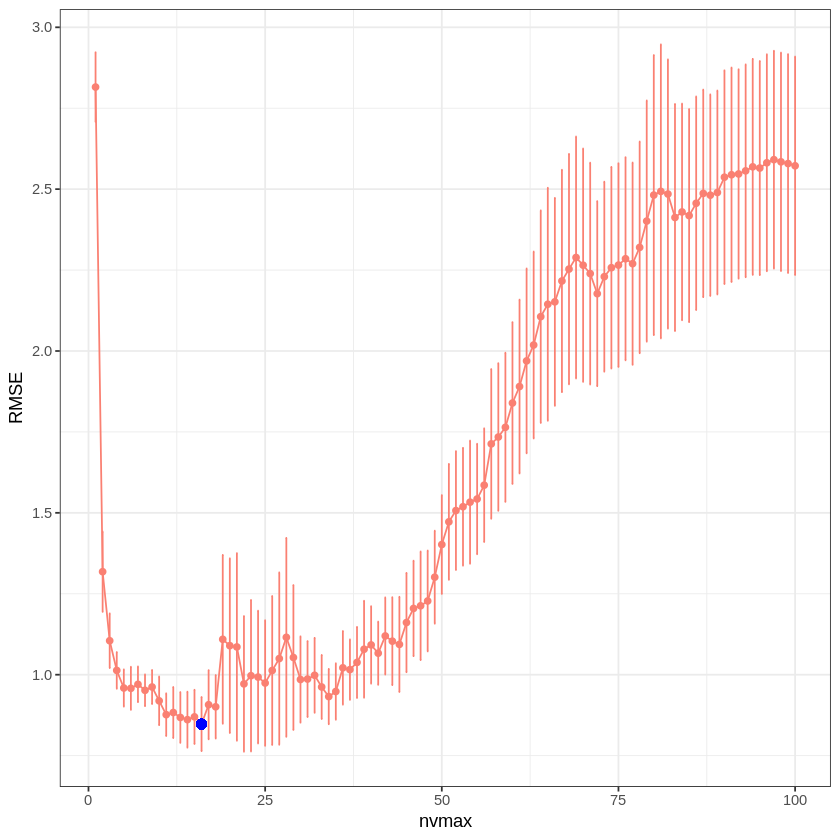

In [8]:
# set seed
set.seed(1234)

# lm using backward stepwise selection with 10-fold CV
lm_reg_absorp_10cv_backwardstep <- suppressWarnings(train(x = absorp_X,
                                                          y = protein,
                                                          method = "leapBackward",
                                                          tuneGrid = data.frame(nvmax = 1:ncol(absorp_X)),
                                                          trControl = trainControl(method = "cv", number = 10)))

# Final Model values
final_backwards_nvmax = lm_reg_absorp_10cv_backwardstep$finalModel$tuneValue
final_backwards_rmse = lm_reg_absorp_10cv_backwardstep$results$RMSE[as.numeric(final_backwards_nvmax)]
final_backwards_r2 = lm_reg_absorp_10cv_backwardstep$results$Rsquared[as.numeric(final_backwards_nvmax)]

# nvmax and RMSE plot
lm_reg_absorp_10cv_backwardstep$results %>%
  ggplot(aes(x = nvmax, y = RMSE)) +
  geom_point(col = "salmon") +
  geom_line(col = "salmon") +
  geom_errorbar(aes(ymin = RMSE - RMSESD/sqrt(10),
                    ymax = RMSE + RMSESD/sqrt(10)),
                width = 0.2, position = position_dodge(0.9),
                col = "salmon") +
  geom_point(data = lm_reg_absorp_10cv_backwardstep$results[as.numeric(final_backwards_nvmax), ],
             aes(x = nvmax, y = RMSE),
             color = "blue", size = 3, shape = 16) +
  theme_bw()

In [9]:
print("RMSE was used to select the optimal model using the smallest value.")
print(paste("The final value used for the model was nvmax =", final_backwards_nvmax))

print(paste("10-fold CV RMSE for nvmax", final_backwards_nvmax, "is", final_backwards_rmse))
print(paste("10-fold CV R2 for nvmax", final_backwards_nvmax, "is", final_backwards_r2))

[1] "RMSE was used to select the optimal model using the smallest value."
[1] "The final value used for the model was nvmax = 16"
[1] "10-fold CV RMSE for nvmax 16 is 0.847478835755952"
[1] "10-fold CV R2 for nvmax 16 is 0.922899168767832"


In [10]:
# Final model outmat
final_backwards_outmat <- summary(lm_reg_absorp_10cv_backwardstep$finalModel)$outmat

# Selected wavelengths have a *
final_backwards_row <- final_backwards_outmat[nrow(final_backwards_outmat), ]
selected_predictors_backwards <- names(final_backwards_row)[final_backwards_row == "*"]

print("Absorbency measures that are included in the final model")
selected_predictors_backwards_list <- list(strsplit(gsub("''", ",", selected_predictors_backwards), ","))
selected_predictors_backwards_list

[1] "Absorbency measures that are included in the final model"


[[1]]
[[1]][[1]]
[1] "wl1"

[[1]][[2]]
[1] "wl3"

[[1]][[3]]
[1] "wl17"

[[1]][[4]]
[1] "wl18"

[[1]][[5]]
[1] "wl32"

[[1]][[6]]
[1] "wl37"

[[1]][[7]]
[1] "wl40"

[[1]][[8]]
[1] "wl44"

[[1]][[9]]
[1] "wl48"

[[1]][[10]]
[1] "wl57"

[[1]][[11]]
[1] "wl68"

[[1]][[12]]
[1] "wl72"

[[1]][[13]]
[1] "wl75"

[[1]][[14]]
[1] "wl87"

[[1]][[15]]
[1] "wl88"

[[1]][[16]]
[1] "wl91"

In [11]:
# Overlapped wavelengths
print("There are 3 overlapped wavelengths between forward and backwards stepwise selection.")
intersect(unlist(selected_predictors_forwards_list), unlist(selected_predictors_backwards_list))

[1] "There are 3 overlapped wavelengths between forward and backwards stepwise selection."


[1] "wl1"  "wl3"  "wl18"

## (e)
(12 pts.) Fit a principal components linear regression model using absorbency measures as the predictors and protein content as the response. Since all of the predictors are measured on the same scale, you do not need to scale them before constructing the principal components. Use 10-fold CV RMSE to select
your final model. Report the 10-fold CV RMSE and R2 values for the final model. DO NOT print out a table with 100 rows showing the results from the train() function. Instead, make a scatterplot of tuning parameter vs. CV RMSE that indicates the optimal tuning parameter value.

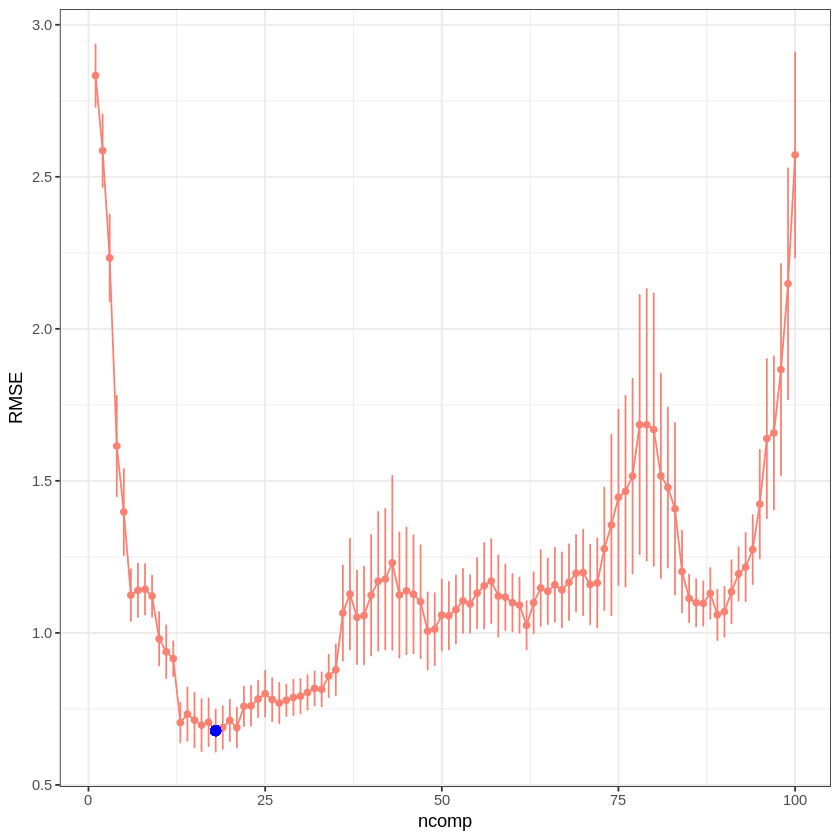

In [12]:
# set seed
set.seed(1234)

# PCR with 10-fold CV
pcr_absorp_10cv <- suppressWarnings(train(x = absorp_X,
                                          y = protein,
                                          method = "pcr",
                                          scale = FALSE,
                                          tuneGrid = data.frame(ncomp = 1:ncol(absorp_X)),
                                          trControl = trainControl(method = "cv", number = 10)))

# Final Model values
final_pcr_ncomp = pcr_absorp_10cv$finalModel$tuneValue
final_pcr_rmse = pcr_absorp_10cv$results$RMSE[as.numeric(final_pcr_ncomp)]
final_pcr_r2 = pcr_absorp_10cv$results$Rsquared[as.numeric(final_pcr_ncomp)]

# ncomp and RMSE plot
pcr_absorp_10cv$results %>%
  ggplot(aes(x = ncomp, y = RMSE)) +
  geom_point(col = "salmon") +
  geom_line(col = "salmon") +
  geom_errorbar(aes(ymin = RMSE - RMSESD/sqrt(10),
                    ymax = RMSE + RMSESD/sqrt(10)),
                width = 0.2, position = position_dodge(0.9),
                col = "salmon") +
  geom_point(data = pcr_absorp_10cv$results[as.numeric(final_pcr_ncomp), ],
             aes(x = ncomp, y = RMSE),
             color = "blue", size = 3, shape = 16) +
  theme_bw()

In [13]:
print("RMSE was used to select the optimal model using the smallest value.")
print(paste("The final value used for the model was ncomp =", final_pcr_ncomp))

print(paste("10-fold CV RMSE for ncomp", final_pcr_ncomp, "is", final_pcr_rmse))
print(paste("10-fold CV R2 for ncomp", final_pcr_ncomp, "is", final_pcr_r2))

[1] "RMSE was used to select the optimal model using the smallest value."
[1] "The final value used for the model was ncomp = 18"
[1] "10-fold CV RMSE for ncomp 18 is 0.67840009550562"
[1] "10-fold CV R2 for ncomp 18 is 0.951179802969283"


## (f)
(12 pts.) Fit a partial least squares regression model using absorbency measures as the predictors and protein content as the response. Since all of the predictors are measured on the same scale, you do not
need to scale them. Use 10-fold CV RMSE to select your final model. Report the 10-fold CV RMSE and R2 values for the final model. DO NOT print out a table with 100 rows showing the results from the train() function. Instead, make a scatterplot of tuning parameter vs. CV RMSE that indicates the optimal tuning parameter value.

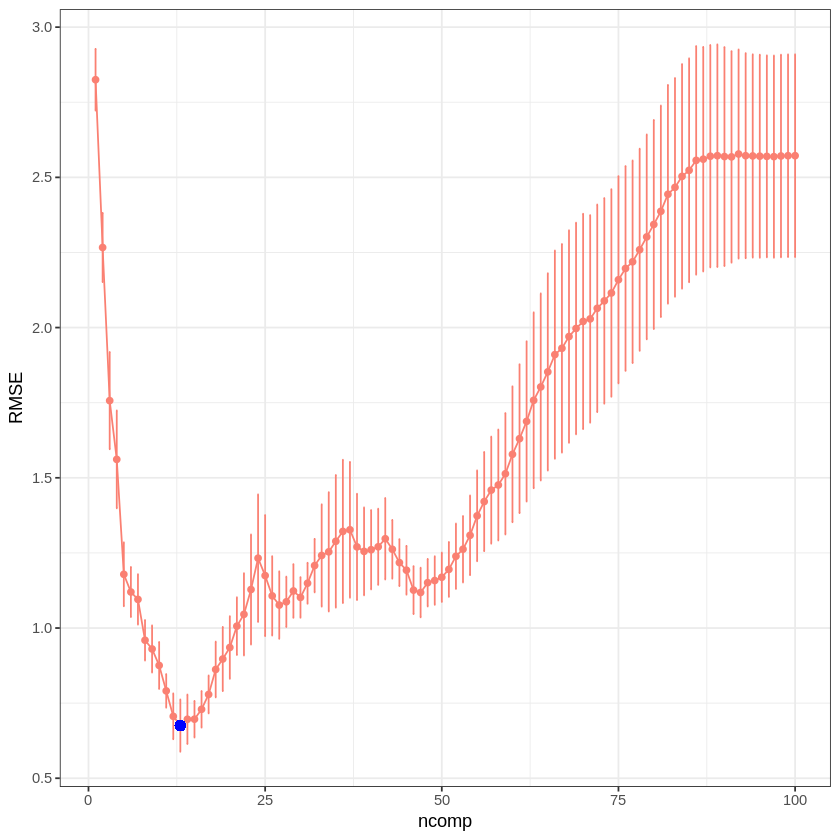

In [14]:
# set seed
set.seed(1234)

# PLSR with 10-fold CV
plsr_absorp_10cv <- suppressWarnings(train(x = absorp_X,
                                           y = protein,
                                           method = "pls",
                                           scale = FALSE,
                                           tuneGrid = data.frame(ncomp = 1:ncol(absorp_X)),
                                           trControl = trainControl(method = "cv", number = 10)))

# Final Model values
final_plsr_ncomp = plsr_absorp_10cv$finalModel$tuneValue
final_plsr_rmse = plsr_absorp_10cv$results$RMSE[as.numeric(final_plsr_ncomp)]
final_plsr_r2 = plsr_absorp_10cv$results$Rsquared[as.numeric(final_plsr_ncomp)]

# ncomp and RMSE plot
plsr_absorp_10cv$results %>%
  ggplot(aes(x = ncomp, y = RMSE)) +
  geom_point(col = "salmon") +
  geom_line(col = "salmon") +
  geom_errorbar(aes(ymin = RMSE - RMSESD/sqrt(10),
                    ymax = RMSE + RMSESD/sqrt(10)),
                width = 0.2, position = position_dodge(0.9),
                col = "salmon") +
  geom_point(data = plsr_absorp_10cv$results[as.numeric(final_plsr_ncomp), ],
             aes(x = ncomp, y = RMSE),
             color = "blue", size = 3, shape = 16) +
  theme_bw()

In [15]:
print("RMSE was used to select the optimal model using the smallest value.")
print(paste("The final value used for the model was ncomp =", final_plsr_ncomp))

print(paste("10-fold CV RMSE for ncomp", final_plsr_ncomp, "is", final_plsr_rmse))
print(paste("10-fold CV R2 for ncomp", final_plsr_ncomp, "is", final_plsr_r2))

[1] "RMSE was used to select the optimal model using the smallest value."
[1] "The final value used for the model was ncomp = 13"
[1] "10-fold CV RMSE for ncomp 13 is 0.675289594480806"
[1] "10-fold CV R2 for ncomp 13 is 0.950299876577847"


## (g)
(14 pts.) Fit a linear regression model with a ridge penalty using absorbency measures as the predictors and protein content as the response. Since all of the predictors are measured on the same scale, you do not need to scale them. Use the glmnet() function to obtain a grid of tuning parameter values to
assess. Use 10-fold CV RMSE to select your final model. Report the 10-fold CV RMSE and R2 values for the final model. DO NOT print out a table with 100 rows showing the results from the train() function. Instead, make a scatterplot of tuning parameter vs. CV RMSE that indicates the optimal tuning parameter value.

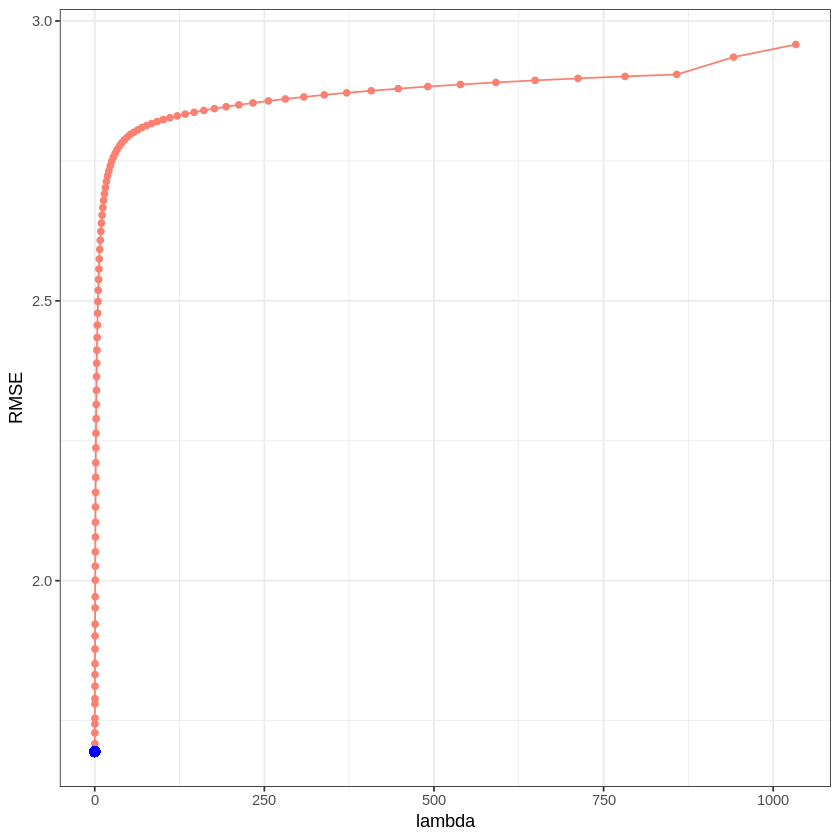

In [16]:
# set seed
set.seed(1234)

# Ridge Lambda tunegrid
absorp_ridge_tunegrid <- glmnet(x = absorp_X,
                                y = protein,
                                alpha = 0.0)

# ridge regression with 10-fold CV
ridge_absorp_10cv <- suppressWarnings(train(x = absorp_X,
                                            y = protein,
                                            method = "glmnet",
                                            scale = FALSE,
                                            tuneGrid = data.frame(alpha = 0, lambda = absorp_ridge_tunegrid$lambda),
                                            trControl = trainControl(method = "cv", number = 10, selectionFunction = "best")))

# Final Model values
final_ridge_lambda = as.numeric(ridge_absorp_10cv$finalModel$tuneValue[2])
final_ridge_rmse = ridge_absorp_10cv$results[ridge_absorp_10cv$results$lambda == final_ridge_lambda, ]$RMSE
final_ridge_r2 = ridge_absorp_10cv$results[ridge_absorp_10cv$results$lambda == final_ridge_lambda, ]$Rsquared

# ncomp and RMSE plot
ridge_absorp_10cv$results %>%
  ggplot(aes(x = lambda, y = RMSE)) +
  geom_point(col = "salmon") +
  geom_line(col = "salmon") +
  geom_point(data =  ridge_absorp_10cv$results[ridge_absorp_10cv$results$lambda == final_ridge_lambda, ],
             aes(x = lambda, y = RMSE),
             color = "blue", size = 3, shape = 16) +
  theme_bw()

In [17]:
print("RMSE was used to select the optimal model using the smallest value.")
print(paste("The final value used for the model was lambda =", final_ridge_lambda))

print(paste("10-fold CV RMSE for lambda", final_ridge_lambda, "is", final_ridge_rmse))
print(paste("10-fold CV R2 for lambda", final_ridge_lambda, "is", final_ridge_r2))

[1] "RMSE was used to select the optimal model using the smallest value."
[1] "The final value used for the model was lambda = 0.164535954798907"
[1] "10-fold CV RMSE for lambda 0.164535954798907 is 1.69464503630363"
[1] "10-fold CV R2 for lambda 0.164535954798907 is 0.708597570422433"


## (h)
(14 pts.) Fit a linear regression model with a LASSO penalty using absorbency measures as the predictors and protein content as the response. Since all of the predictors are measured on the same scale, you do not need to scale them. Use the glmnet() function to obtain a grid of tuning parameter
values to assess. Use 10-fold CV RMSE to select your final model. Report the 10-fold CV RMSE and R2 values for the final model. DO NOT print out a table with 100 rows showing the results from the train() function. Instead, make a scatterplot of tuning parameter vs. CV RMSE that indicates the optimal tuning parameter value.

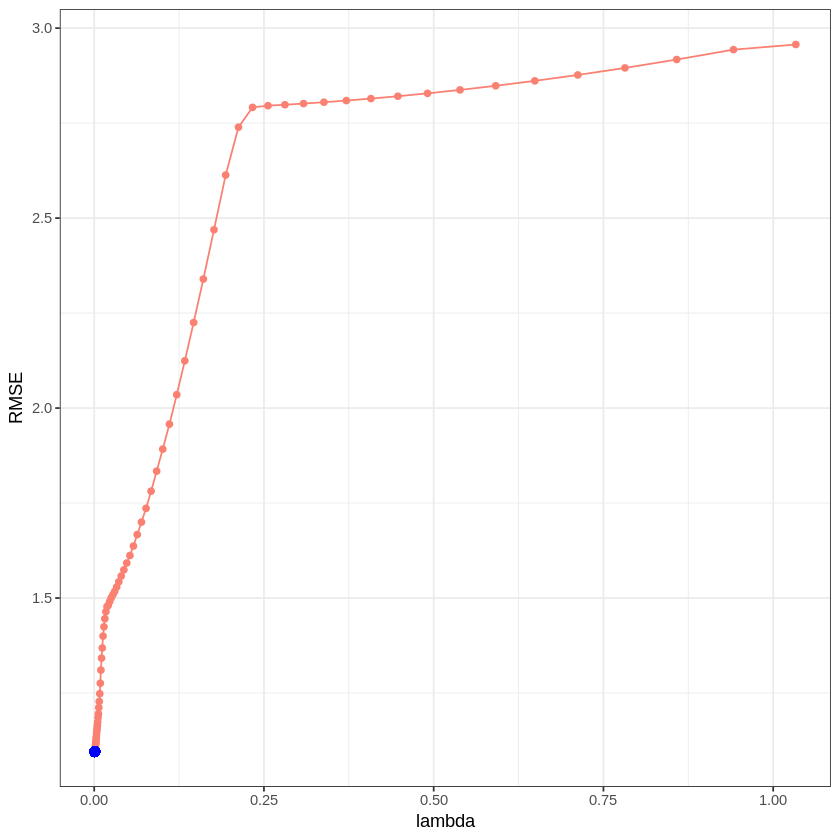

In [18]:
# set seed
set.seed(1234)

# Lasso Lambda tunegrid
absorp_lasso_tunegrid <- glmnet(x = absorp_X,
                                y = protein,
                                alpha = 1)

# Lasso regression with 10-fold CV
lasso_absorp_10cv <- suppressWarnings(train(x = absorp_X,
                                            y = protein,
                                            method = "glmnet",
                                            scale = FALSE,
                                            tuneGrid = data.frame(alpha = 1, lambda = absorp_lasso_tunegrid$lambda),
                                            trControl = trainControl(method = "cv", number = 10, selectionFunction = "best")))

# Final Model values
final_lasso_lambda = as.numeric(lasso_absorp_10cv$finalModel$tuneValue[2])
final_lasso_rmse = lasso_absorp_10cv$results[lasso_absorp_10cv$results$lambda == final_lasso_lambda, ]$RMSE
final_lasso_r2 = lasso_absorp_10cv$results[lasso_absorp_10cv$results$lambda == final_lasso_lambda, ]$Rsquared

# ncomp and RMSE plot
lasso_absorp_10cv$results %>%
  ggplot(aes(x = lambda, y = RMSE)) +
  geom_point(col = "salmon") +
  geom_line(col = "salmon") +
  geom_point(data =  lasso_absorp_10cv$results[lasso_absorp_10cv$results$lambda == final_lasso_lambda, ],
             aes(x = lambda, y = RMSE),
             color = "blue", size = 3, shape = 16) +
  theme_bw()

In [19]:
print("RMSE was used to select the optimal model using the smallest value.")
print(paste("The final value used for the model was lambda =", final_lasso_lambda))

print(paste("10-fold CV RMSE for lambda", final_lasso_lambda, "is", final_lasso_rmse))
print(paste("10-fold CV R2 for lambda", final_lasso_lambda, "is", final_lasso_r2))

[1] "RMSE was used to select the optimal model using the smallest value."
[1] "The final value used for the model was lambda = 0.000963690512576028"
[1] "10-fold CV RMSE for lambda 0.000963690512576028 is 1.09573391510884"
[1] "10-fold CV R2 for lambda 0.000963690512576028 is 0.884233886987547"


## (i)
(6 pts.) Based on the plots of tuning parameter vs. CV RMSE for the ridge and LASSO regression models, why might you be uncertain if you have selected an optimal value for the tuning parameter in each case? What would be your next step to ensure that you can find the optimal parameter? (You do not have to carry this out in R, just explain how you would do it.)

In both ridge and lasso regression final models, the lambda selected with the smallest RMSE was the lowest available lambda in both respective lambda tune grid. This means potentially, there could be an even smaller lambda value we haven't tested that could have a better CV RMSE. The next steps would be to generate my own lambda tune grid table that contains lambda values smaller than what was used, 0.16 for ridge and 0.00096 for lasso and re-run my training to see if a smaller lambda would generate a better 10-fold CV RMSE.

## (j)
(10 pts.) In the parts above you have fit the following models: (1) linear model based on least squares estimation, (2) linear model based on forward stepwise selection, (3) linear model based on backward stepwise selection, (4) principal components linear model, (5) partial least squares model, (6) linear ridge regression model, and (7) linear LASSO regression model. Based on 10-fold CV RMSE, which model appears to be the best predictive model? Which is best if we consider 10-fold CV R2? For comparison, make a plot of Wavelength Index vs. coefficient estimate for each of the 7 final models. Make 7 separate plots but put them in the same plotting region (i.e., there should be 7 separate plot/panels but in one figure).

In [20]:
# Dictionary of model and rmse
models_rmse <- c(
  "Linear" = 2.572102,
  "Stepwise Forward" = final_forwards_rmse,
  "Stepwise Backward" = final_backwards_rmse,
  "PCR" = final_pcr_rmse,
  "PLSR" = final_plsr_rmse,
  "Ridge" = final_ridge_rmse,
  "LASSO" = final_lasso_rmse
)

# Dictionary of model and r2
models_r2 <- c(
  "Linear" = 0.7048167,
  "Stepwise Forward" = final_forwards_r2,
  "Stepwise Backward" = final_backwards_r2,
  "PCR" = final_pcr_r2,
  "PLSR" = final_plsr_r2,
  "Ridge" = final_ridge_r2,
  "LASSO" = final_lasso_r2
)

In [21]:
# Graphing Function
coeff_estimate_plotting <- function(model, plot_data) {
  ggplot(plot_data, aes(x = plot_data[,1], y = plot_data[,2])) +
  geom_point(color = "blue") +
  geom_line(group = 1, color = "red") +
  theme_minimal() +
  labs(title = paste(model, "-- Wavelength vs Coefficient Estimate"), x = "Wavelength", y = "Coefficient Estimate") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
}

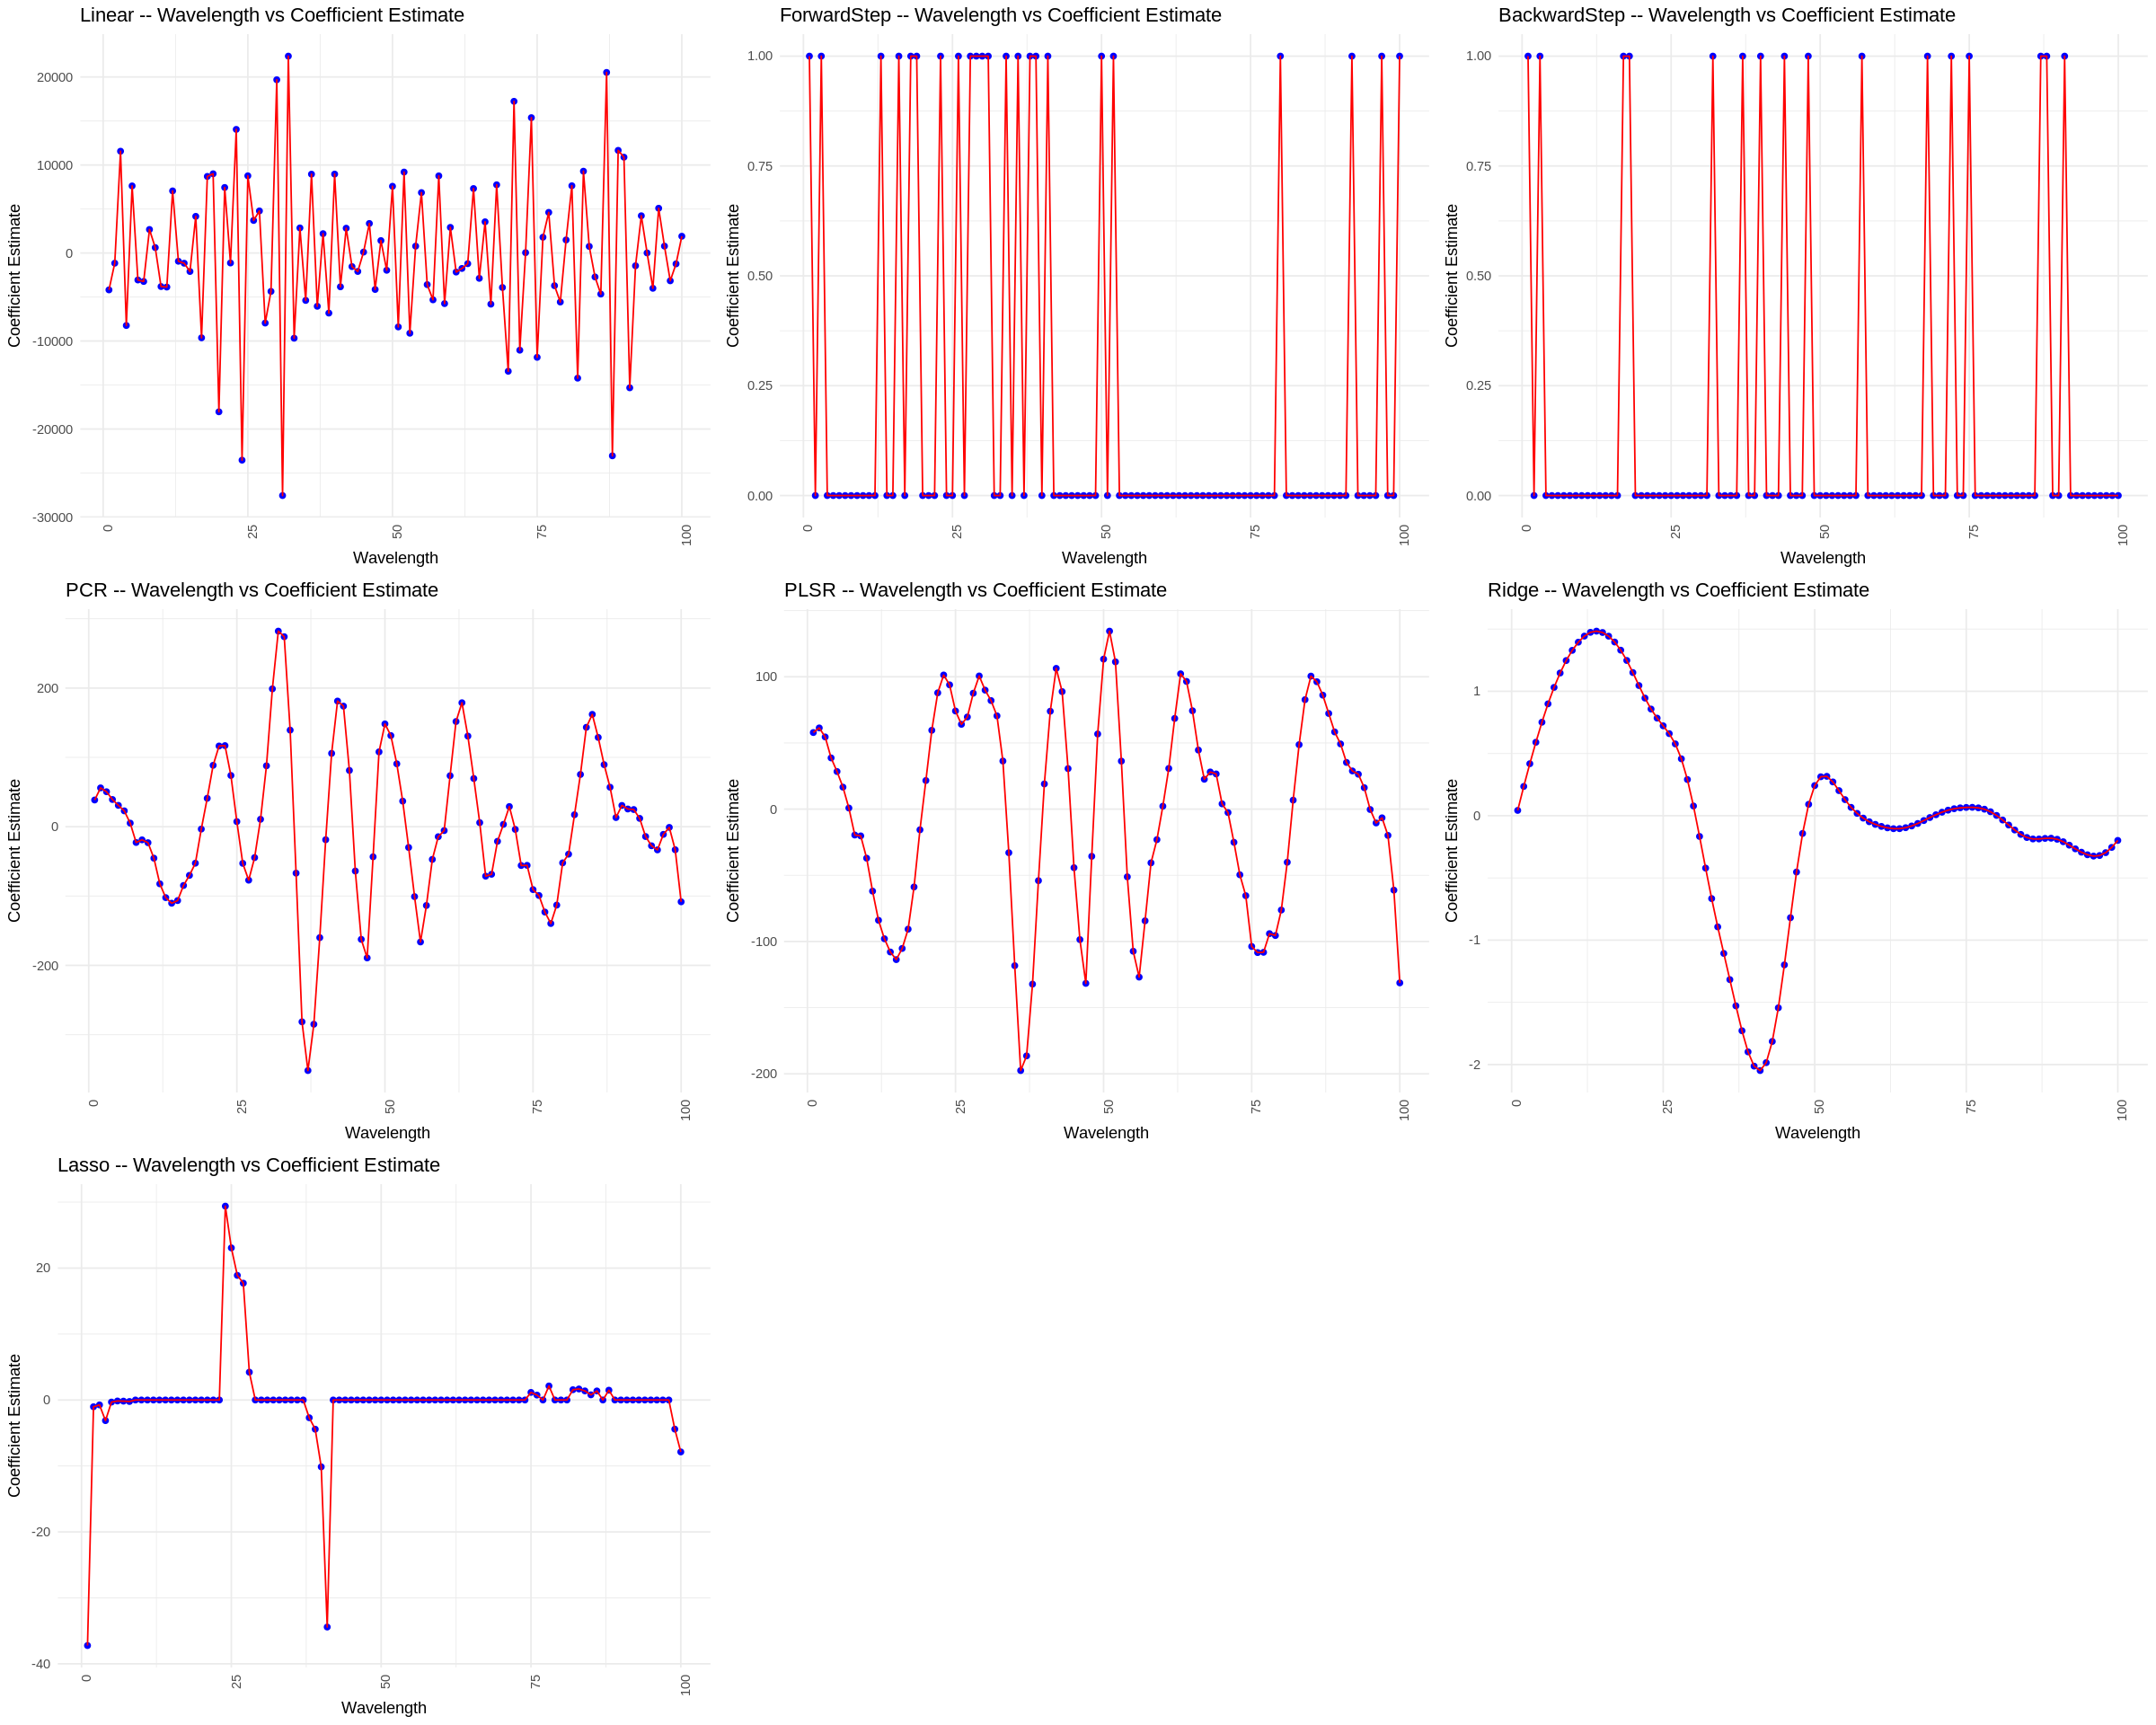

In [22]:
options(repr.plot.width = 20, repr.plot.height = 16)
# Forwardstep Coefficient Estimate
forwardstep_coefficient_estimates <- rep(0, 100)

forwardstep_selected_wavelengths <- gsub("wl", "", selected_predictors_forwards)
forwardstep_selected_wavelengths <- as.numeric(forwardstep_selected_wavelengths)

forwardstep_coefficient_estimates[forwardstep_selected_wavelengths] <- 1

# Backward Coefficient Estimate
backwardstep_coefficient_estimates <- rep(0, 100)

backwardstep_selected_wavelengths <- gsub("wl", "", selected_predictors_backwards)
backwardstep_selected_wavelengths <- as.numeric(backwardstep_selected_wavelengths)

backwardstep_coefficient_estimates[backwardstep_selected_wavelengths] <- 1


# Plot Data
plot_data_linear <- data.frame(wavelength = 1:100, coeff_estimate = coef(lm_reg_absorp_10cv$finalModel)[-1])
plot_data_forwardstep <- data.frame(wavelength = 1:100, coeff_estimate = forwardstep_coefficient_estimates)
plot_data_backwardstep <- data.frame(wavelength = 1:100, coeff_estimate = backwardstep_coefficient_estimates)
plot_data_pcr <- data.frame(wavelength = 1:100, coeff_estimate = coef(pcr_absorp_10cv$finalModel, ncomp = pcr_absorp_10cv$finalModel$tuneValue$ncomp))
plot_data_plsr <- data.frame(wavelength = 1:100, coeff_estimate = coef(plsr_absorp_10cv$finalModel, ncomp = plsr_absorp_10cv$finalModel$tuneValue$ncomp))
plot_data_ridge <- data.frame(wavelength = 1:100, coeff_estimate = predict(ridge_absorp_10cv$finalModel, s = ridge_absorp_10cv$bestTune$lambda, type = "coef")[-1])
plot_data_lasso <- data.frame(wavelength = 1:100, coeff_estimate = predict(lasso_absorp_10cv$finalModel, s = lasso_absorp_10cv$bestTune$lambda, type = "coef")[-1])


# Plots
plot_linear <- coeff_estimate_plotting("Linear", plot_data_linear)
plot_forwardstep <- coeff_estimate_plotting("ForwardStep", plot_data_forwardstep)
plot_backwardstep <- coeff_estimate_plotting("BackwardStep", plot_data_backwardstep)
plot_pcr <- coeff_estimate_plotting("PCR", plot_data_pcr)
plot_plsr <- coeff_estimate_plotting("PLSR", plot_data_plsr)
plot_ridge <- coeff_estimate_plotting("Ridge", plot_data_ridge)
plot_lasso <- coeff_estimate_plotting("Lasso", plot_data_lasso)

grid.arrange(plot_linear, plot_forwardstep, plot_backwardstep, plot_pcr, plot_plsr, plot_ridge, plot_lasso, ncol = 3, nrow = 3)

In [23]:
# Model with lowest rmse
lowest_rmse <- min(models_rmse)
lowest_rmse_model <- names(models_rmse)[models_rmse == lowest_rmse]
print(paste("The model with the lowest RMSE is", lowest_rmse_model, "with 10-fold CV RMSE =", lowest_rmse))

# Model with highest r2
highest_r2 <- max(models_r2)
highest_r2_model <- names(models_r2)[models_r2 == highest_r2]
print(paste("The model with the highest R2 is", highest_r2_model, "with 10-fold CV R2 =", highest_r2))

[1] "The model with the lowest RMSE is PLSR with 10-fold CV RMSE = 0.675289594480806"
[1] "The model with the highest R2 is PCR with 10-fold CV R2 = 0.951179802969283"


# Question 2
(44 pts.) The Core Temperature Dataset contains information on 7908 participants from a retrospective cohort study of intraoperative core temperature during colorectal surgery and its association with risk of
surgical site infection. Detailed information about the data set and the data dictionary can be found at https://www.causeweb.org/tshs/core-temperature/. The data dictionary is also available on Blackboard
(Core_Temperature_Data_Dictionary.pdf) along with the data set (Core_Temperature.csv). Suppose that you want to build a classifier to predict whether a patient develops any infection (AnyInfection) based on the following list of potential predictors: `Age`, `FEMALE`, `BMI`, `CharlsonScore`, `CHF`, `VALVE`, `DM`, `RENLFAIL`, `LIVER`, `METS`, `TUMOR`, `COAG`, `OBESE`, `WGHTLOSS`, `LYTES`, `BLDLOSS`, `ANEMDEF`, `DRUG`, `SteroidHx`, `ImmunosuppressantHx`, `SurgDuration`, `Open`, `TWATemp`, `LastReadingTemp`, `EndCaseTemp`

In [24]:
# Load in data
core_temperature_data <- read_csv("/content/Core_Temperature.csv")

# List of Potential Predictors
potential_predictors <- c("Age", "FEMALE", "BMI", "CharlsonScore", "CHF", "VALVE", "DM", "RENLFAIL", "LIVER", "METS", "TUMOR",
                          "COAG", "OBESE", "WGHTLOSS", "LYTES", "BLDLOSS", "ANEMDEF", "DRUG", "SteroidHx", "ImmunosuppressantHx",
                          "SurgDuration", "Open", "TWATemp", "LastReadingTemp", "EndCaseTemp", "AnyInfection")

# Trim down to selected potential predictors
core_temperature_selected <- core_temperature_data %>%
  dplyr::select(all_of(potential_predictors))

# Factor the categorical variables
core_temperature_selected$FEMALE <- factor(core_temperature_selected$FEMALE)
core_temperature_selected$CHF <- factor(core_temperature_selected$CHF)
core_temperature_selected$VALVE <- factor(core_temperature_selected$VALVE)
core_temperature_selected$DM <- factor(core_temperature_selected$DM)
core_temperature_selected$RENLFAIL <- factor(core_temperature_selected$RENLFAIL)
core_temperature_selected$LIVER <- factor(core_temperature_selected$LIVER)
core_temperature_selected$METS <- factor(core_temperature_selected$METS)
core_temperature_selected$TUMOR <- factor(core_temperature_selected$TUMOR)
core_temperature_selected$COAG <- factor(core_temperature_selected$COAG)
core_temperature_selected$OBESE <- factor(core_temperature_selected$OBESE)
core_temperature_selected$WGHTLOSS <- factor(core_temperature_selected$WGHTLOSS)
core_temperature_selected$LYTES <- factor(core_temperature_selected$LYTES)
core_temperature_selected$BLDLOSS <- factor(core_temperature_selected$BLDLOSS)
core_temperature_selected$ANEMDEF <- factor(core_temperature_selected$ANEMDEF)
core_temperature_selected$DRUG <- factor(core_temperature_selected$DRUG)
core_temperature_selected$SteroidHx <- factor(core_temperature_selected$SteroidHx)
core_temperature_selected$ImmunosuppressantHx <- factor(core_temperature_selected$ImmunosuppressantHx)
core_temperature_selected$Open <- factor(core_temperature_selected$Open)
core_temperature_selected$AnyInfection <- factor(core_temperature_selected$AnyInfection)
levels(core_temperature_selected$AnyInfection) <- make.names(levels(core_temperature_selected$AnyInfection))


# Predictors
core_temperature_selected_X <- core_temperature_selected %>%
  select(-AnyInfection)

# Target
core_temperature_selected_Y <- core_temperature_selected$AnyInfection


# View Data
head(core_temperature_selected_X)
head(core_temperature_selected_Y)

Rows: 7908 Columns: 47
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (46): YEAR, Age, FEMALE, BMI, CharlsonScore, CHF, VALVE, DM, RENLFAIL, L...
lgl  (1): SurgeryType

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,FEMALE,BMI,CharlsonScore,CHF,VALVE,DM,RENLFAIL,LIVER,METS,⋯,BLDLOSS,ANEMDEF,DRUG,SteroidHx,ImmunosuppressantHx,SurgDuration,Open,TWATemp,LastReadingTemp,EndCaseTemp
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
63.7,0,39.3,2,0,0,0,0,0,0,⋯,0,0,0,0,0,180,1,36.4,36.4,36.8
58.7,0,25.3,3,0,0,1,0,0,0,⋯,0,0,0,1,0,205,1,35.5,35.6,36.1
84.6,0,31.6,1,0,0,1,0,0,0,⋯,0,0,0,0,0,207,0,35.1,35.0,36.2
35.1,1,25.5,0,0,1,0,0,0,0,⋯,0,1,0,1,0,98,1,36.0,36.2,36.6
49.3,0,22.2,6,0,0,0,0,0,1,⋯,0,1,0,0,0,90,0,35.3,35.4,36.2
62.9,0,33.0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,172,0,36.4,36.4,36.8


[1] X0 X0 X1 X0 X0 X0
Levels: X0 X1

## (a)
(10 pts.) Fit a logistic model via maximum likelihood estimation that uses all of the predictors listed above. Use 10-fold CV to select an optimal threshold for the classifier based on the best combination of sensitivity and specificity (i.e., the threshold yielding the largest sum of these values). Use possible threshold values of 0.10 to 0.90 in increments of 0.10. Report the threshold, sensitivity, specificity, and Cohen’s κ values for the selected classifier.

In [25]:
# Logistic Model with Thresholds
set.seed(1234)

lr_core_temperature_selected_10cv <- suppressWarnings(train(x = core_temperature_selected_X,
                                                            y = core_temperature_selected_Y,
                                                            method = "glm",
                                                            family = "binomial",
                                                            trControl = trainControl(method = "cv",
                                                                                     number = 10,
                                                                                     classProbs = TRUE,
                                                                                     summaryFunction = twoClassSummary,
                                                                                     savePredictions = TRUE)))

# Sequence of threshold values
prob_thresh <- seq(0.10, 0.90, by = 0.10)

# use thresholder() function to obtain accuracy measures at each threshold
lr_core_temperature_selected_10cv_ths <- thresholder(lr_core_temperature_selected_10cv,
                                                     threshold = prob_thresh,
                                                     final = FALSE,
                                                     statistics = c("Sensitivity", "Specificity", "Accuracy", "Kappa"))

lr_core_temperature_selected_10cv_ths$sum_sen_spec <- lr_core_temperature_selected_10cv_ths$Sensitivity + lr_core_temperature_selected_10cv_ths$Specificity

In [26]:
# Threshold row with maximized sensitivity and specificity
highest_sen_spec_row <- lr_core_temperature_selected_10cv_ths[which.max(lr_core_temperature_selected_10cv_ths$sum_sen_spec), ]

print(paste("Optimal threshold based on maximizing sensitivity and specificity is", highest_sen_spec_row$prob_threshold))
print(paste("Its maximized sensitivity and specificity is", highest_sen_spec_row$sum_sen_spec))
print(paste("Its sensitivity value is ", highest_sen_spec_row$Sensitivity))
print(paste("Its specificity value is ", highest_sen_spec_row$Specificity))
print(paste("Its Cohen's k (Kappa) value is", highest_sen_spec_row$Kappa))

[1] "Optimal threshold based on maximizing sensitivity and specificity is 0.9"
[1] "Its maximized sensitivity and specificity is 1.18393383902233"
[1] "Its sensitivity value is  0.371828908554572"
[1] "Its specificity value is  0.812104930467762"
[1] "Its Cohen's k (Kappa) value is 0.0737572249168647"


## (b)
(12 pts.) Fit a logistic model with a ridge penalty. Use 10-fold CV to select both an optimal tuning parameter and threshold for the classifier based on the best combination of sensitivity and specificity (i.e., the threshold yielding the largest sum of these values). Use possible threshold values of 0.10 to 0.90 in increments of 0.10. Report the threshold, sensitivity, specificity, and Cohen’s κ values for the selected classifier.

In [27]:
# Logistic Model with Thresholds utlizing Ridge Penalty
set.seed(1234)

ridge_space <- glmnet(x = core_temperature_selected_X, y = core_temperature_selected_Y, family = "binomial", alpha = 0)
tunegrid_ridge <- data.frame(alpha = 0, lambda = ridge_space$lambda)

lr_core_temperature_selected_10cv_ridge <- suppressWarnings(train(x = core_temperature_selected_X,
                                                                  y = core_temperature_selected_Y,
                                                                  method = "glmnet",
                                                                  family = "binomial",
                                                                  scale = TRUE,
                                                                  tuneGrid = tunegrid_ridge,
                                                                  trControl = trainControl(method = "cv",
                                                                                           number = 10,
                                                                                           classProbs = TRUE,
                                                                                           summaryFunction = twoClassSummary,
                                                                                           savePredictions = TRUE)))

# Sequence of threshold values
prob_thresh <- seq(0.10, 0.90, by = 0.10)

# use thresholder() function to obtain accuracy measures at each threshold
lr_core_temperature_selected_10cv_ridge_ths <- thresholder(lr_core_temperature_selected_10cv_ridge,
                                                           threshold = prob_thresh,
                                                           final = FALSE,
                                                           statistics = c("Sensitivity", "Specificity", "Accuracy", "Kappa"))

lr_core_temperature_selected_10cv_ridge_ths$sum_sen_spec <- lr_core_temperature_selected_10cv_ridge_ths$Sensitivity + lr_core_temperature_selected_10cv_ridge_ths$Specificity

In [28]:
# Threshold row with maximized sensitivity and specificity
highest_sen_spec_row_ridge <- lr_core_temperature_selected_10cv_ridge_ths[which.max(lr_core_temperature_selected_10cv_ridge_ths$sum_sen_spec), ]

print(paste("Optimal threshold based on maximizing sensitivity and specificity is", highest_sen_spec_row_ridge$prob_threshold))
print(paste("Its maximized sensitivity and specificity is", highest_sen_spec_row_ridge$sum_sen_spec))
print(paste("Its sensitivity value is ", highest_sen_spec_row_ridge$Sensitivity))
print(paste("Its specificity value is ", highest_sen_spec_row_ridge$Specificity))
print(paste("Its Cohen's k (Kappa) value is", highest_sen_spec_row_ridge$Kappa))

[1] "Optimal threshold based on maximizing sensitivity and specificity is 0.9"
[1] "Its maximized sensitivity and specificity is 1.18055731142014"
[1] "Its sensitivity value is  0.36047197640118"
[1] "Its specificity value is  0.820085335018963"
[1] "Its Cohen's k (Kappa) value is 0.0714891750989833"


## (c)
(12 pts) Fit a logistic model with a LASSO penalty. Use 10-fold CV to select both an optimal tuning parameter and threshold for the classifier based on the best combination of sensitivity and specificity (i.e., the threshold yielding the largest sum of these values). Use possible threshold values of 0.10 to
0.90 in increments of 0.10. Report the threshold, sensitivity, specificity, and Cohen’s κ values for the selected classifier.

In [29]:
# Logistic Model with Thresholds utlizing Lasso Penalty
set.seed(1234)

lasso_space <- glmnet(x = core_temperature_selected_X, y = core_temperature_selected_Y, family = "binomial", alpha = 1)
tunegrid_lasso <- data.frame(alpha = 1, lambda = lasso_space$lambda)

lr_core_temperature_selected_10cv_lasso <- suppressWarnings(train(x = core_temperature_selected_X,
                                                                  y = core_temperature_selected_Y,
                                                                  method = "glmnet",
                                                                  family = "binomial",
                                                                  tuneGrid = tunegrid_lasso,
                                                                  trControl = trainControl(method = "cv",
                                                                                           number = 10,
                                                                                           classProbs = TRUE,
                                                                                           summaryFunction = twoClassSummary,
                                                                                           savePredictions = TRUE)))

# Sequence of threshold values
prob_thresh <- seq(0.10, 0.90, by = 0.10)

# use thresholder() function to obtain accuracy measures at each threshold
lr_core_temperature_selected_10cv_lasso_ths <- thresholder(lr_core_temperature_selected_10cv_lasso,
                                                           threshold = prob_thresh,
                                                           final = FALSE,
                                                           statistics = c("Sensitivity", "Specificity", "Accuracy", "Kappa"))

lr_core_temperature_selected_10cv_lasso_ths$sum_sen_spec <- lr_core_temperature_selected_10cv_lasso_ths$Sensitivity + lr_core_temperature_selected_10cv_lasso_ths$Specificity

In [30]:
# Threshold row with maximized sensitivity and specificity
highest_sen_spec_row_lasso <- lr_core_temperature_selected_10cv_lasso_ths[which.max(lr_core_temperature_selected_10cv_lasso_ths$sum_sen_spec), ]

print(paste("Optimal threshold based on maximizing sensitivity and specificity is", highest_sen_spec_row_lasso$prob_threshold))
print(paste("Its maximized sensitivity and specificity is", highest_sen_spec_row_lasso$sum_sen_spec))
print(paste("Its sensitivity value is ", highest_sen_spec_row_lasso$Sensitivity))
print(paste("Its specificity value is ", highest_sen_spec_row_lasso$Specificity))
print(paste("Its Cohen's k (Kappa) value is", highest_sen_spec_row_lasso$Kappa))

[1] "Optimal threshold based on maximizing sensitivity and specificity is 0.9"
[1] "Its maximized sensitivity and specificity is 1.18029393173198"
[1] "Its sensitivity value is  0.348672566371681"
[1] "Its specificity value is  0.831621365360303"
[1] "Its Cohen's k (Kappa) value is 0.0703546704716819"


## (d)
(10 pts) Of the three final classifiers that you selected in parts (a) - (c) select the one that performs
best with respect to the sum of the sensitivity and specificity and provide the relevant information
that would be required for another person to use the selected classifier to predict the class for a new
observation.

In [31]:
print(paste("Logistic Model maximized sensitivity and specificity is", highest_sen_spec_row$sum_sen_spec))
print(paste("Logistic Model with RIDGE maximized sensitivity and specificity is", highest_sen_spec_row_ridge$sum_sen_spec))
print(paste("Logistic Model with LASSO maximized sensitivity and specificity is", highest_sen_spec_row_lasso$sum_sen_spec))

[1] "Logistic Model maximized sensitivity and specificity is 1.18393383902233"
[1] "Logistic Model with RIDGE maximized sensitivity and specificity is 1.18055731142014"
[1] "Logistic Model with LASSO maximized sensitivity and specificity is 1.18029393173198"


Both the ridge and lasso had similar maximized sensitivity and specificity of 1.181 and 1.180 respectively, while the default logistic model had the highest with a value of 1.184. The optimal threshold for all three was also 0.9.

To utlize the default logistics model I could save my model as a RDS file for their use. They would load the RDS file in their R enviroment and then use the predict function with the 0.90 threshold. Below would be an example usage.

Note: their newdata needs to have the same columns / data types as what I used to train my model.

In [32]:
# Save the default logistics model
saveRDS(lr_core_temperature_selected_10cv, file = "lr_core_temperature_selected_10cv.rds")

# Load the model from the RDS file
lr_core_temperature_selected_10cv_LOADED <- readRDS("/content/lr_core_temperature_selected_10cv.rds")

# predict probabilities; New_Observations is where they would put their new data to predict on
pred_probs <- predict(lr_core_temperature_selected_10cv_LOADED, newdata = New_Observations, type = "prob")

# predict classes using threshold; if the probability for X1 is greater or equal to 0.90 (threshold), then it will be class X1 else class X0
pred_classes <- ifelse(pred_probs$X1 >= 0.9, "X1", "X0")